# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rama Almer Felix
- **Email:** ramaalmerfelix@gmail.com
- **ID Dicoding:** ramag123

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Pengaruh Kondisi Cuaca dan Musim terhadap Penggunaan Sepeda
- Pertanyaan 2: Seperti Apa Pola Penggunaan Sepeda Berdasarkan Waktu ?

## Import Semua Packages/Library yang Digunakan
Pada bagian ini, kita akan mengimpor semua library yang diperlukan untuk analisis data. Kita menggunakan pandas dan numpy untuk manipulasi dan analisis data, serta matplotlib dan seaborn untuk visualisasi data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data
Sekarang kita akan memuat dataset yang akan digunakan untuk analisis. Untuk proyek ini, kita menggunakan dataset Bike Sharing yang terdiri dari dua file: day.csv dan hour.csv.

#### Memuat Dataset Harian

In [2]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Memuat Dataset Per Jam

In [3]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Eksplorasi Awal Dataset Harian
Setelah memuat dataset harian, langkah selanjutnya adalah melakukan eksplorasi awal. Kita akan memeriksa ukuran dataset, tipe data dari setiap kolom, dan mencari tahu apakah ada nilai yang hilang.

In [4]:
print("Ukuran dataset harian:", day_df.shape)

print("\nTipe data setiap kolom:\n", day_df.dtypes)

print("\nJumlah nilai yang hilang per kolom:\n", day_df.isnull().sum())


Ukuran dataset harian: (731, 16)

Tipe data setiap kolom:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Jumlah nilai yang hilang per kolom:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### Eksplorasi Awal Dataset Per Jam

In [5]:
print("Ukuran dataset per jam:", hour_df.shape)

print("\nTipe data setiap kolom:\n", hour_df.dtypes)

print("\nJumlah nilai yang hilang per kolom:\n", hour_df.isnull().sum())

Ukuran dataset per jam: (17379, 17)

Tipe data setiap kolom:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Jumlah nilai yang hilang per kolom:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


1. Ukuran dataset harian memiliki 731 entri dengan 16 kolom.
2. Ukuran dataset per jam memiliki 17.379 entri dengan 17 kolom.
3. Tidak ada nilai yang hilang di kedua dataset, yang merupakan indikasi data berkualitas baik.
4. Tipe data kolom `dteday` adalah `object`, yang menunjukkan bahwa kolom ini saat ini dianggap sebagai teks atau string. Untuk analisis yang melibatkan tanggal atau waktu, akan lebih efektif jika kita mengubah tipe data ini ke `datetime`.


#### Cek duplikasi data pada dataset harian

In [6]:
duplikasi_harian = day_df.duplicated().sum()
print("Jumlah data duplikat pada dataset harian:", duplikasi_harian)

Jumlah data duplikat pada dataset harian: 0


#### Cek duplikasi data pada dataset per jam

In [7]:
duplikasi_perjam = hour_df.duplicated().sum()
print("Jumlah data duplikat pada dataset per jam:", duplikasi_perjam)

Jumlah data duplikat pada dataset per jam: 0


#### Menampilkan statistik deskriptif untuk dataset harian

In [8]:
print("\nStatistik Deskriptif untuk dataset harian:\n", day_df.describe())


Statistik Deskriptif untuk dataset harian:
           instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.6278

#### Menampilkan statistik deskriptif untuk dataset per jam

In [9]:
print("\nStatistik Deskriptif untuk dataset per jam:\n", hour_df.describe())


Statistik Deskriptif untuk dataset per jam:
           instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165    

### Cleaning Data

#### Mengubah tipe data kolom `dteday` menjadi datetime pada kedua dataset

In [10]:
# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
print(day_df.dtypes)
day_df.head()


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
print(hour_df.dtypes)
hour_df.head()

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengganti Nama Kolom Pada Kedua Dataset

In [13]:
# Mengganti nama kolom pada dataset harian
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}, inplace=True)

# Mengganti nama kolom pada dataset per jam
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'feels_like_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'cnt': 'total_users'
}, inplace=True)


In [14]:
day_df.head()

,instant,date,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
hour_df.head()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# Definisikan peta untuk mengganti angka dengan label deskriptif
weather_labels = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan', 4: 'Cuaca Buruk'}

# Ganti nilai numerik dengan label deskriptif langsung pada DataFrame asli
day_df['weather_condition'] = day_df['weather_condition'].map(weather_labels)

# Konfirmasi perubahan dengan menampilkan beberapa baris pertama
day_df.head()


,instant,date,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users
0,1,2011-01-01,1,0,1,0,6,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
day_df.head()

,instant,date,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temperature,feels_like_temperature,humidity,wind_speed,casual_users,registered_users,total_users
0,1,2011-01-01,1,0,1,0,6,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah angka bulan menjadi nama bulan pada kedua dataset


In [18]:
# Mendefinisikan mapping dari angka bulan ke nama bulan
month_mapping = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 
    4: 'April', 5: 'Mei', 6: 'Juni', 
    7: 'Juli', 8: 'Agustus', 9: 'September', 
    10: 'Oktober', 11: 'November', 12: 'Desember'
}

# Mengubah angka bulan menjadi nama bulan
day_df['month'] = day_df['month'].map(month_mapping)
hour_df["month"] = hour_df['month'].map(month_mapping)

In [19]:
# Dictionary untuk mengonversi angka musim menjadi nama musim
musim_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}

# Mengganti nilai musim dengan nama musim
day_df['season'] = day_df['season'].map(musim_mapping)

Setelah meninjau kedua dataset, saya memutuskan untuk fokus pada analisis data harian (`day_df`) karena lebih sesuai dengan pertanyaan bisnis saya. Analisis data per jam (`hour_df`) memang memberikan detail tambahan, namun untuk tujuan analisis saya, data harian sudah memberikan wawasan yang cukup dan menjawab pertanyaan bisnis tanpa menambah kompleksitas yang tidak perlu. Oleh karena itu, saya memilih untuk tidak menggunakan data per jam dalam analisis lebih lanjut.


In [20]:
# Menghapus DataFrame 'hour_df' dari memori untuk menghindari penggunaan yang tidak disengaja
del hour_df

# Opsional: Mengonfirmasi bahwa DataFrame 'hour_df' telah dihapus
try:
    print(hour_df.head())
except NameError:
    print("DataFrame 'hour_df' telah berhasil dihapus.")


DataFrame 'hour_df' telah berhasil dihapus.


## Exploratory Data Analysis (EDA)

### Explore data harian (day_df)

In [21]:
# Mengatur kolom 'month' sebagai kategori dengan urutan tertentu
day_df['month'] = pd.Categorical(day_df['month'], 
                                 categories=['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'],
                                 ordered=True)

# Kelompokkan penyewa sepeda berdasarkan bulan dengan urutan bulan yang benar
grouped_by_month = day_df.groupby('month', observed=False)[['casual_users', 'registered_users', 'total_users']].sum()

# Tampilkan DataFrame
grouped_by_month

,casual_users,registered_users,total_users
month,,,
Januari,12042,122891,134933
Februari,14963,136389,151352
Maret,44444,184476,228920
April,60802,208292,269094
Mei,75285,256401,331686
Juni,73906,272436,346342
Juli,78157,266791,344948
Agustus,72039,279155,351194
September,70323,275668,345991


hasil diatas menunjukkan bahwa bulan Mei hingga Agustus memiliki jumlah total penyewa sepeda tertinggi, yang menunjukkan puncak kegiatan penyewaan sepeda selama musim panas. Di sisi lain, bulan-bulan musim dingin, terutama Januari dan Desember, menunjukkan jumlah penyewaan terendah, mengindikasikan adanya pengaruh signifikan dari kondisi cuaca dan musim terhadap aktivitas penyewaan sepeda.

In [22]:
# Kelompokkan penyewa sepeda berdasarkan keadaan cuaca
grouped_by_weather = day_df.groupby('weather_condition')[['casual_users', 'registered_users', 'total_users']].sum()

# Tampilkan DataFrame
grouped_by_weather


,casual_users,registered_users,total_users
weather_condition,,,
Berkabut,169776,827082,996858
Cerah,446346,1811606,2257952
Hujan,3895,33974,37869


Kondisi cuaca cerah mendominasi jumlah penyewaan sepeda, baik untuk pengguna casual maupun terdaftar, yang mengindikasikan preferensi yang kuat untuk bersepeda di cuaca yang baik.

In [23]:
# Kelompokkan penyewa sepeda berdasarkan hari libur
grouped_by_holiday = day_df.groupby('is_holiday')[['casual_users', 'registered_users', 'total_users']].sum()

# Tampilkan DataFrame
grouped_by_holiday


,casual_users,registered_users,total_users
is_holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


Aktivitas penyewaan sepeda jauh lebih tinggi pada hari-hari bukan libur, menunjukkan bahwa sepeda banyak digunakan untuk kegiatan sehari-hari seperti pergi ke tempat kerja atau sekolah.

In [24]:
# Bandingkan penyewa sepeda pada saat hari kerja vs akhir pekan
day_df['day_type'] = day_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
grouped_by_day_type = day_df.groupby('day_type')[['casual_users', 'registered_users', 'total_users']].sum()

# Tampilkan DataFrame
grouped_by_day_type


,casual_users,registered_users,total_users
day_type,,,
Weekday,325644,2045201,2370845
Weekend,294373,627461,921834


Pada hari kerja, jumlah pengguna terdaftar jauh lebih tinggi dibandingkan akhir pekan, menandakan bahwa sepeda banyak digunakan untuk keperluan sehari-hari seperti berangkat kerja, sedangkan di akhir pekan, penggunaan sepeda oleh pengguna casual lebih dominan, mengindikasikan kegiatan rekreasi atau santai.

In [25]:
# Kelompokkan penyewa sepeda berdasarkan hari kerja
grouped_by_workingday = day_df.groupby('is_workingday')[['casual_users', 'registered_users', 'total_users']].sum()

# Tampilkan DataFrame
grouped_by_workingday


,casual_users,registered_users,total_users
is_workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Pada hari kerja, terjadi peningkatan signifikan dalam jumlah pengguna terdaftar, yang mengindikasikan penggunaan sepeda yang luas dalam perjalanan rutin, sedangkan pada hari bukan kerja, terdapat peningkatan penggunaan sepeda oleh pengguna casual.

In [26]:
# Kelompokkan penyewa sepeda berdasarkan musim
grouped_by_season = day_df.groupby('season')[['casual_users', 'registered_users', 'total_users']].sum()

# Tampilkan DataFrame
grouped_by_season


,casual_users,registered_users,total_users
season,,,
Musim Dingin,129782,711831,841613
Musim Gugur,226091,835038,1061129
Musim Panas,203522,715067,918589
Musim Semi,60622,410726,471348


Musim gugur dan musim panas menunjukkan jumlah penyewaan sepeda tertinggi, baik untuk pengguna casual maupun terdaftar, menandakan bahwa kondisi cuaca yang lebih hangat dan menyenangkan mendukung aktivitas bersepeda.

In [27]:
# Kelompokkan variabel lingkungan (temperatur, kelembaban, kecepatan angin) berdasarkan musim
grouped_by_season_env = day_df.groupby('season')[['temperature', 'humidity', 'wind_speed']].mean()

# Tampilkan DataFrame
grouped_by_season_env


,temperature,humidity,wind_speed
season,,,
Musim Dingin,0.422906,0.668719,0.171995
Musim Gugur,0.706309,0.633482,0.172095
Musim Panas,0.544405,0.626948,0.203507
Musim Semi,0.297748,0.582903,0.214537


Musim gugur menampilkan kondisi cuaca yang paling ideal untuk bersepeda dengan suhu yang hangat dan kelembaban yang moderat, sedangkan musim semi cenderung lebih sejuk dan lebih berangin.

In [28]:
# Analisis hubungan antara pengguna casual, terdaftar, dan total penyewaan
correlation_matrix = day_df[['casual_users', 'registered_users', 'total_users']].corr()

# Tampilkan matriks korelasi
correlation_matrix


,casual_users,registered_users,total_users
casual_users,1.000000,0.395282,0.672804
registered_users,0.395282,1.000000,0.945517
total_users,0.672804,0.945517,1.000000


Terdapat korelasi yang signifikan antara jumlah pengguna terdaftar dan total pengguna, menunjukkan bahwa pengguna terdaftar merupakan kontributor utama dalam total penyewaan sepeda. Pengguna casual juga berkontribusi secara signifikan, meskipun tidak sebanyak pengguna terdaftar.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Kondisi Cuaca dan Musim terhadap Penggunaan Sepeda

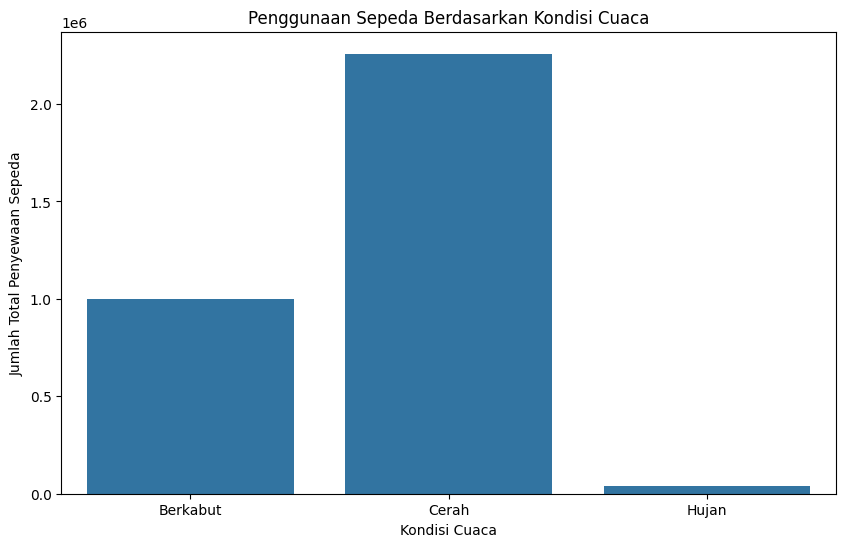

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_by_weather.index, y='total_users', data=grouped_by_weather.reset_index())
plt.title('Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.show()

Grafik menunjukkan bahwa cuaca cerah memiliki dampak positif yang signifikan pada jumlah total penyewaan sepeda, dengan jumlah penyewaan yang jauh lebih tinggi dibandingkan hari berkabut atau hujan. Hal ini menegaskan bahwa cuaca cerah mendorong aktivitas bersepeda, sedangkan kondisi cuaca yang kurang ideal seperti hujan dan kabut cenderung menurunkan jumlah penyewaan.

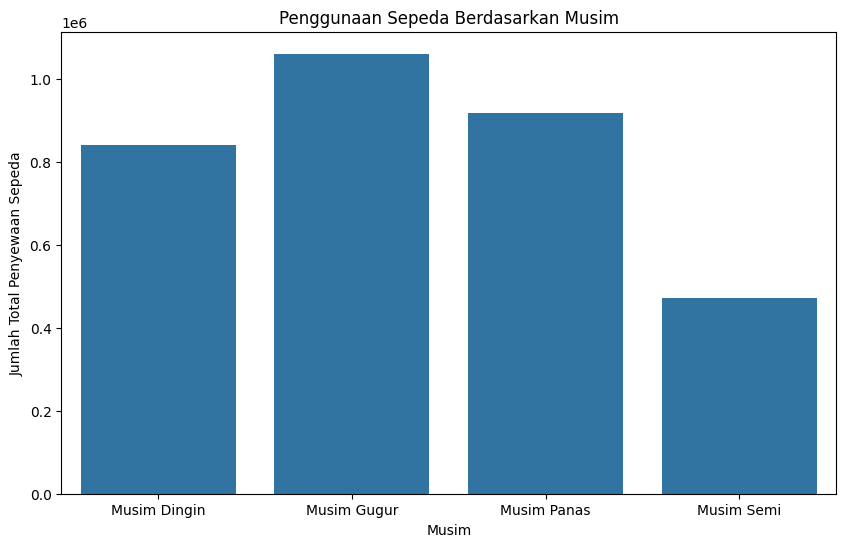

In [30]:
# Visualisasi Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_by_season.index, y='total_users', data=grouped_by_season)
plt.title('Penggunaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.show()


Dari grafik terlihat bahwa musim gugur adalah waktu paling populer untuk penyewaan sepeda, diikuti oleh musim panas. Ini menunjukkan preferensi kuat untuk bersepeda selama bulan-bulan dengan cuaca yang lebih hangat. Musim dingin, yang memiliki jumlah penyewaan terendah, menunjukkan bahwa suhu yang lebih dingin dan kondisi cuaca yang mungkin lebih keras memiliki dampak negatif pada keinginan orang untuk menyewa sepeda.

### Pertanyaan 2: Bagaimana Pola Penggunaan Sepeda Berbeda antara Hari Kerja dan Akhir Pekan?

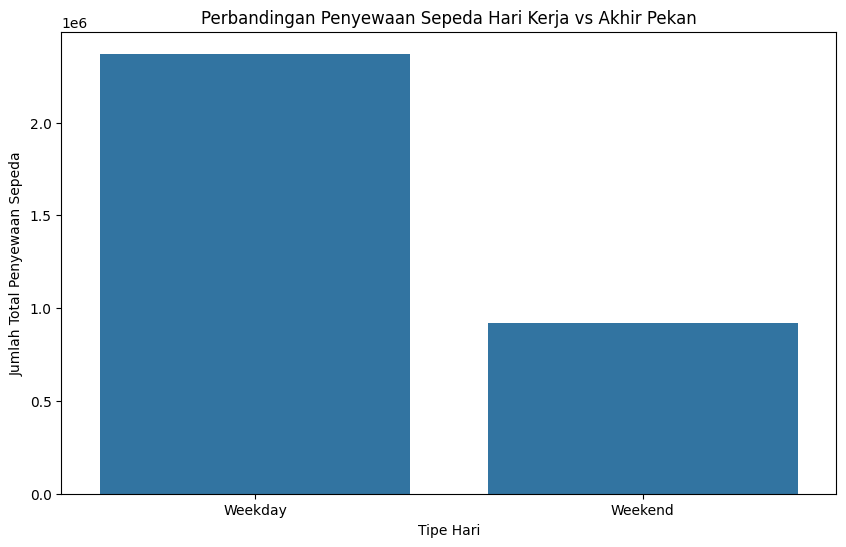

In [31]:
# Visualisasi Perbandingan Hari Kerja dan Akhir Pekan
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_by_day_type.index, y='total_users', data=grouped_by_day_type)
plt.title('Perbandingan Penyewaan Sepeda Hari Kerja vs Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.show()

Grafik menunjukkan bahwa penyewaan sepeda pada hari kerja secara signifikan lebih tinggi dibandingkan dengan akhir pekan. Ini mengindikasikan bahwa sepeda banyak digunakan untuk keperluan rutin seperti pergi ke tempat kerja atau institusi pendidikan. Pada akhir pekan, terjadi penurunan yang menonjol dalam jumlah penyewaan, yang bisa disebabkan oleh kegiatan rekreasi yang lebih fleksibel atau kecenderungan untuk beristirahat dan tidak melakukan kegiatan yang memerlukan transportasi.

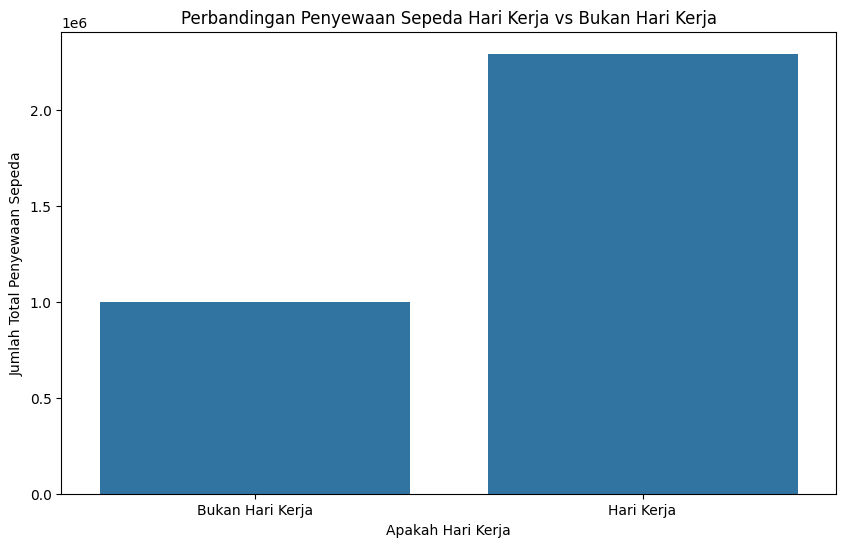

In [32]:
# Visualisasi Perbandingan Hari Kerja dan Bukan Hari Kerja
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_by_workingday.index, y='total_users', data=grouped_by_workingday)
plt.title('Perbandingan Penyewaan Sepeda Hari Kerja vs Bukan Hari Kerja')
plt.xlabel('Apakah Hari Kerja')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.xticks([0, 1], ['Bukan Hari Kerja', 'Hari Kerja'])  # Memastikan label sumbu x jelas
plt.show()


Grafik ini memperlihatkan bahwa terdapat peningkatan yang sangat besar dalam penyewaan sepeda pada hari kerja dibandingkan dengan hari-hari bukan kerja. Hal ini menegaskan bahwa sepeda merupakan pilihan transportasi yang populer selama hari kerja, dan menunjukkan potensi untuk peningkatan layanan dan fasilitas yang ditujukan untuk komuter sehari-hari. Pada hari-hari bukan kerja, angka yang lebih rendah mungkin mencerminkan pengurangan kebutuhan akan transportasi atau preferensi untuk menghabiskan waktu di rumah atau di lingkungan sekitar.

## Conclusion

- Conclution pertanyaan 1

Data menunjukkan bahwa hari kerja mengalami volume penyewaan sepeda yang jauh lebih tinggi dibandingkan dengan akhir pekan, yang menandakan peran sepeda sebagai alat transportasi penting untuk kegiatan rutin sehari-hari. Kebutuhan untuk bersepeda pada hari kerja mungkin terkait erat dengan perjalanan kerja dan sekolah, sedangkan penurunan pada akhir pekan dapat mencerminkan kegiatan yang lebih santai atau rekreasi. Penyedia layanan penyewaan sepeda dapat mempertimbangkan untuk menawarkan diskon atau promosi pada akhir pekan untuk meningkatkan tingkat penyewaan atau mengeksplorasi kemitraan dengan kegiatan rekreasi dan acara lokal untuk menarik lebih banyak pengguna casual.

- Conclution pertanyaan 2

Data menunjukkan bahwa hari kerja mengalami volume penyewaan sepeda yang jauh lebih tinggi dibandingkan dengan akhir pekan, yang menandakan peran sepeda sebagai alat transportasi penting untuk kegiatan rutin sehari-hari. Kebutuhan untuk bersepeda pada hari kerja mungkin terkait erat dengan perjalanan kerja dan sekolah, sedangkan penurunan pada akhir pekan dapat mencerminkan kegiatan yang lebih santai atau rekreasi. Penyedia layanan penyewaan sepeda dapat mempertimbangkan untuk menawarkan diskon atau promosi pada akhir pekan untuk meningkatkan tingkat penyewaan atau mengeksplorasi kemitraan dengan kegiatan rekreasi dan acara lokal untuk menarik lebih banyak pengguna casual.